In [4]:
# Download the AiZynth models and data (if needed)
# !download_public_data aizynth_data
import os
import subprocess
import glob

# Path to the folder expected
folder_path = 'aizynth_data'

# Check if the folder exists
if not os.path.exists(folder_path):
    # Terminate if no folder
    print(f"Terminated, {folder_path} folder not found, see cell above to create.")
else:
    # Check for some Aizynthfiles already existing'
    #uspto_files = glob.glob(os.path.join(folder_path, 'uspto*'))
    zinc_files = glob.glob(os.path.join(folder_path, 'zinc*'))
    con_file = glob.glob(os.path.join(folder_path, 'config*'))

    if zinc_files and con_file:
        # Terminate if these files are already downloaded
        print("Terminated, files starting with 'uspto', 'zinc', and 'config' are already present.")
    else:
        # If the files are not there, download the files using subprocess
        print("Downloading files...")
        # `download_public_data folder_path` is an aizynthfinder command line program
        subprocess.run(["download_public_data", folder_path])

Terminated, files starting with 'uspto', 'zinc', and 'config' are already present.


In [5]:
# Now CD to aizynth_data folder
import os
os.chdir('aizynth_data')

In [7]:
pwd

'/Users/student/retrosynthesis_workshop/retrosynthesis/04_AiZynthFinder/aizynth_data'

In [8]:
# Adapted from AiZynthFinder docs: https://molecularai.github.io/aizynthfinder/python_interface.html#
from aizynthfinder.aizynthfinder import AiZynthFinder
finder = AiZynthFinder(configfile="config.yml")

# Select policies
finder.stock.select("zinc")
finder.expansion_policy.select("uspto")
finder.filter_policy.select("uspto")

In [9]:
import rdkit
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem

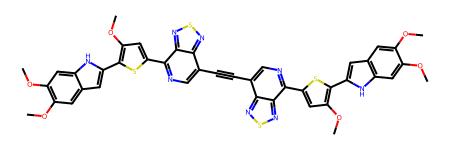

In [14]:
Chem.MolFromSmiles("COC1=CC2=C(C=C1OC)N([H])C(C3=C(OC)C=C(S3)C4=NC=C(C#CC(C5=NSN=C65)=CN=C6C(S7)=CC(OC)=C7C8=CC(C=C9OC)=C(C=C9OC)N8[H])C%10=NSN=C4%10)=C2")

In [24]:
# Set the target molecule
# CID 10615
finder.target_smiles = "COC1=CC2=C(C=C1OC)N([H])C(C3=C(OC)C=C(S3)C4=CC=C(C5=CC(OC)=C(S5)C6=C(OC)C=C(C(C7=NSN=C87)=CC=C8C(S9)=CC(OC)=C9C%10=CC(C=C%11OC)=C(C=C%11OC)N%10[H])S6)C%12=NSN=C4%12)=C2"

# Perfrom the retro tree search
finder.tree_search()

# Build the routes
finder.build_routes()

In [25]:
# Get tree statistics
stats = finder.extract_statistics()
stats

{'target': '[H]n1c(-c2sc(-c3ccc(-c4cc(OC)c(-c5sc(-c6ccc(-c7cc(OC)c(-c8cc9cc(OC)c(OC)cc9n8[H])s7)c7nsnc67)cc5OC)s4)c4nsnc34)cc2OC)cc2cc(OC)c(OC)cc21',
 'search_time': 22.64540696144104,
 'first_solution_time': 0,
 'first_solution_iteration': 0,
 'number_of_nodes': 746,
 'max_transforms': 6,
 'max_children': 30,
 'number_of_routes': 289,
 'number_of_solved_routes': 0,
 'top_score': 0.7184601461011058,
 'is_solved': False,
 'number_of_steps': 6,
 'number_of_precursors': 4,
 'number_of_precursors_in_stock': 3,
 'precursors_in_stock': 'COc1ccc(NN)cc1OC, CCOC(=O)OCC, C[Mg]Br',
 'precursors_not_in_stock': 'COc1cc2cc(-c3sc(-c4ccc(-c5cc(OC)c(-c6sc(-c7ccc(-c8cc(OC)c(C=O)s8)c8nsnc78)cc6OC)s5)c5nsnc45)cc3OC)[nH]c2cc1OC',
 'precursors_availability': 'zinc;zinc;zinc;Not in stock',
 'policy_used_counts': {'uspto': 745},
 'profiling': {'expansion_calls': 457,
  'reactants_generations': 1255,
  'iterations': 100}}

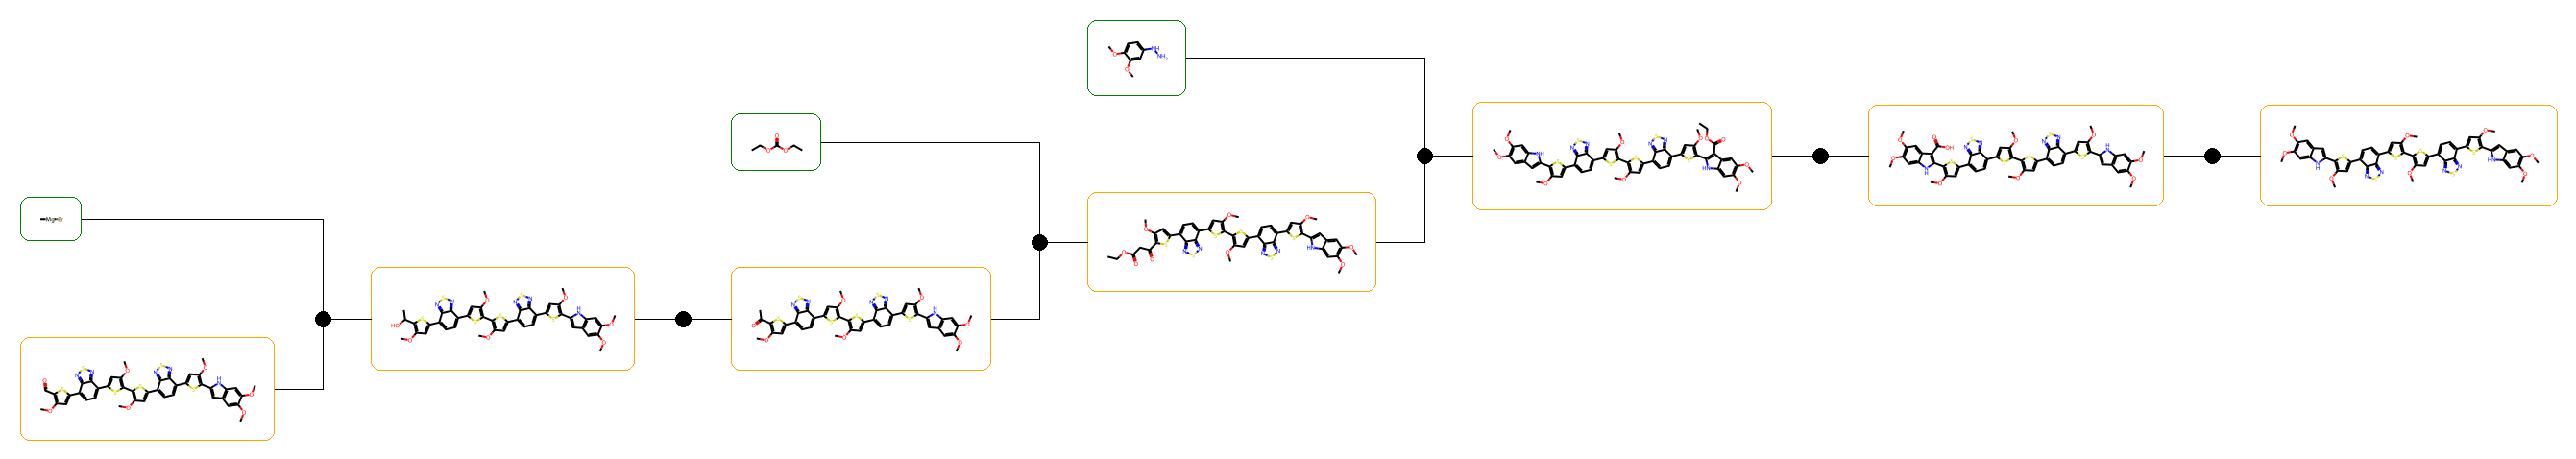

In [26]:
# Collect images of sequences
# display first 5
images = finder.routes.images
from IPython.display import display
for image in images[0:1]:
  display(image)